بسم الله الرحمن الرحيم
اللهم صل على محمد وعلى آل محمد كما صليت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد، اللهم بارك على محمد وعلى آل محمد كما باركت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد




In [2]:
import os
dir=os.getcwd()
dir

'F:\\Time-Invariant  aging model Final\\Objective_1'

In [3]:
data_folder_path=dir + '/datafiles_objective_1'

# Start

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Ovjective-1
## Applying machine learning algorithm to develop a model that can successfully capture aging


# Data Preprocessing
## Putting all files into a single dataframe

In [8]:
data_folder_path=dir + '/datafiles_objective_1/'

In [9]:
list_dir = [i for i in os.listdir(data_folder_path)]

In [15]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir(data_folder_path)]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv(data_folder_path +d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

In [19]:
final_df

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.80607,0.336661,0.390837,0.828399,0.521382,0.59903,0.34635,2
0,1,0.852819,0.442643,0.38698,0.774311,0.461004,0.659254,0.393676,5
0,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.30682,0.384508,8
0,1,0.883831,0.395061,0.415456,0.69811,0.419721,0.409635,0.361281,10
0,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14
...,...,...,...,...,...,...,...,...,...
0,82,0.97119,0.456241,0.431464,0.688562,0.362097,0.776495,0.421004,22
0,82,0.922055,0.457388,0.366031,0.807954,0.40289,0.800289,0.386978,23
0,82,0.948693,0.473651,0.409538,0.731037,0.290797,0.600109,0.465623,25
0,82,0.914195,0.500786,0.416904,0.543606,0.480518,0.876548,0.394899,27


In [25]:
final_df.to_csv(dir + '/final_df.csv',mode = 'w', index=False)

In [10]:
final_df=pd.read_csv('final_df.csv')
final_df.head(3)

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8


In [11]:
final_df.shape

(1002, 9)

### Class distribution

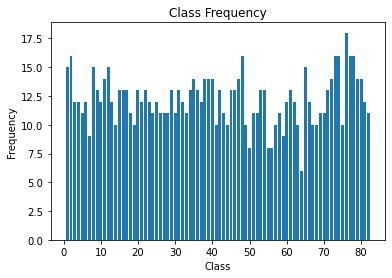

In [31]:
classes=final_df[['ID']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Splitting data in training and validation(test) sets

In [12]:
train_size = len(final_df['ID'].unique()) * .8

In [13]:
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(final_df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, final_df[final_df['ID']==i]])
    else:
        valid = pd.concat([valid, final_df[final_df['ID']==i]])

In [14]:
print(valid.shape,train.shape)

(212, 9) (790, 9)


In [15]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation (Test) Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation (Test) Set Has: 16 people


In [16]:
X_train = train[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_train = train['AGE']

X_valid = valid[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_valid = valid['AGE']

In [17]:
X_train.head(2)

,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index
0,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350
1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676


In [18]:
y_valid=valid[['AGE']]

In [19]:
y_train=train[['AGE']]

In [20]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(790, 7) (790, 1) (212, 7) (212, 1)


## The Mean absolute error (MAE) for Kernel Regression model

In [21]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=3,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3,2],
                              "gamma": np.logspace(-2, 2, 5),
                              "degree": [0,1,2,3,4]})

In [22]:
kr.fit(X_train, y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid))))

MAE: 10.235163852688782


### We have MAE=10.23 .Now we drop the features one by one and check whether our MAE increase or decrease?

In [23]:
kr_score_all_feats = mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid))

In [24]:
kernel_importance = list()
for feature in   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']:
    print("Dropping "+ feature)
    kr.fit(X_train.drop(feature,axis =1 ), y_train)
    kernel_importance.append(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 )))-kr_score_all_feats)
    print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 )))))
    print("Score decreased by : " +str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 ))) -kr_score_all_feats)) 


Droping Facial Index
MAE: 10.29189534344413
Score decreased by : 0.056731490755348446
Droping Mandibular Index
MAE: 10.251645991344702
Score decreased by : 0.01648213865592041
Droping Intercantal Index
MAE: 10.234045568396922
Score decreased by : -0.0011182842918593394
Droping Orbital Width Index
MAE: 10.309011890291261
Score decreased by : 0.07384803760247927
Droping Eye Fissure Index
MAE: 10.419635908040208
Score decreased by : 0.18447205535142608
Droping Vermilion Height Index
MAE: 10.199300982034071
Score decreased by : -0.03586287065471083
Droping Mouth Face Width Index
MAE: 9.906054773429045
Score decreased by : -0.3291090792597373


### In above calculation,its observed that "Mouth Face Width Index"(-0.329) and "Vermilion Height Index" (-0.035) considerably increases the error.Therefore we drop both these features and check the MAE

In [25]:
kr.fit(X_train.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1), y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1)))))


MAE: 9.77531444552188


### After dropping the two features i.e "Mouth Face Width Index" and "Vermilion Height Index", our MAE decreased from 10.23 to 9.77

# Using Polynomial Regression

In [26]:
poly_mod = Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression(fit_intercept=True))])
poly = GridSearchCV(poly_mod, cv=3, param_grid={"poly__degree": [1,2,3,5]})
poly.fit(X_train,y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid))))

MAE: 10.273646554943683


In [27]:
poly_score_all_feats = mean_squared_error(y_true= y_valid, y_pred=poly.predict(X_valid))

### Dropping the features one by one and check the effect on MAE

In [28]:
poly_importance = list()
for feature in   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']:
    print("Droping "+ feature)
    poly_mod = Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression(fit_intercept=True))])
    poly = GridSearchCV(poly_mod, cv=5, param_grid={"poly__degree": [1,2,3,4]})
    poly.fit(X_train.drop(feature, axis=1),y_train)
    poly_importance.append(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 )))-kr_score_all_feats)
    print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 )))))
    print("Score decreased by : " +str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 ))) -kr_score_all_feats)) 


Droping Facial Index
MAE: 10.309421953838662
Score decreased by : 0.07425810114987996
Droping Mandibular Index
MAE: 10.3262686853303
Score decreased by : 0.09110483264151803
Droping Intercantal Index
MAE: 10.273238883022438
Score decreased by : 0.03807503033365656
Droping Orbital Width Index
MAE: 10.272561513931864
Score decreased by : 0.03739766124308197
Droping Eye Fissure Index
MAE: 10.427354741837721
Score decreased by : 0.19219088914893945
Droping Vermilion Height Index
MAE: 10.273334124100044
Score decreased by : 0.03817027141126239
Droping Mouth Face Width Index
MAE: 10.06030427204965
Score decreased by : -0.1748595806391311


In [29]:
poly_importance

[0.07425810114987996,
 0.09110483264151803,
 0.03807503033365656,
 0.03739766124308197,
 0.19219088914893945,
 0.03817027141126239,
 -0.1748595806391311]

### In the above procedure,its obsereved that after dropping 'Mouth Face Width Index' we see that MAE decreased for Polynomial regression
### Therefore we drop 'Mouth Face Width Index' feature and again check the MAE

In [30]:
poly.fit(X_train.drop('Mouth Face Width Index', axis =1),y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop('Mouth Face Width Index', axis =1)))))

MAE: 10.06030427204965


### The MAE for polynomial model decreased from 10.27 to 10.06 after dropping "Mouth Face Width Index" feature

## Plotting the importance of features for Kernel and Polynomial models

In [31]:
importance_df = pd.DataFrame()
importance_df["Feature"] =   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']

In [32]:
importance_df['Polynomial Importance'] = poly_importance
importance_df['Kernel Importance'] = kernel_importance


In [33]:
importance_df = importance_df.sort_values('Kernel Importance',ascending=False)

E:\anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


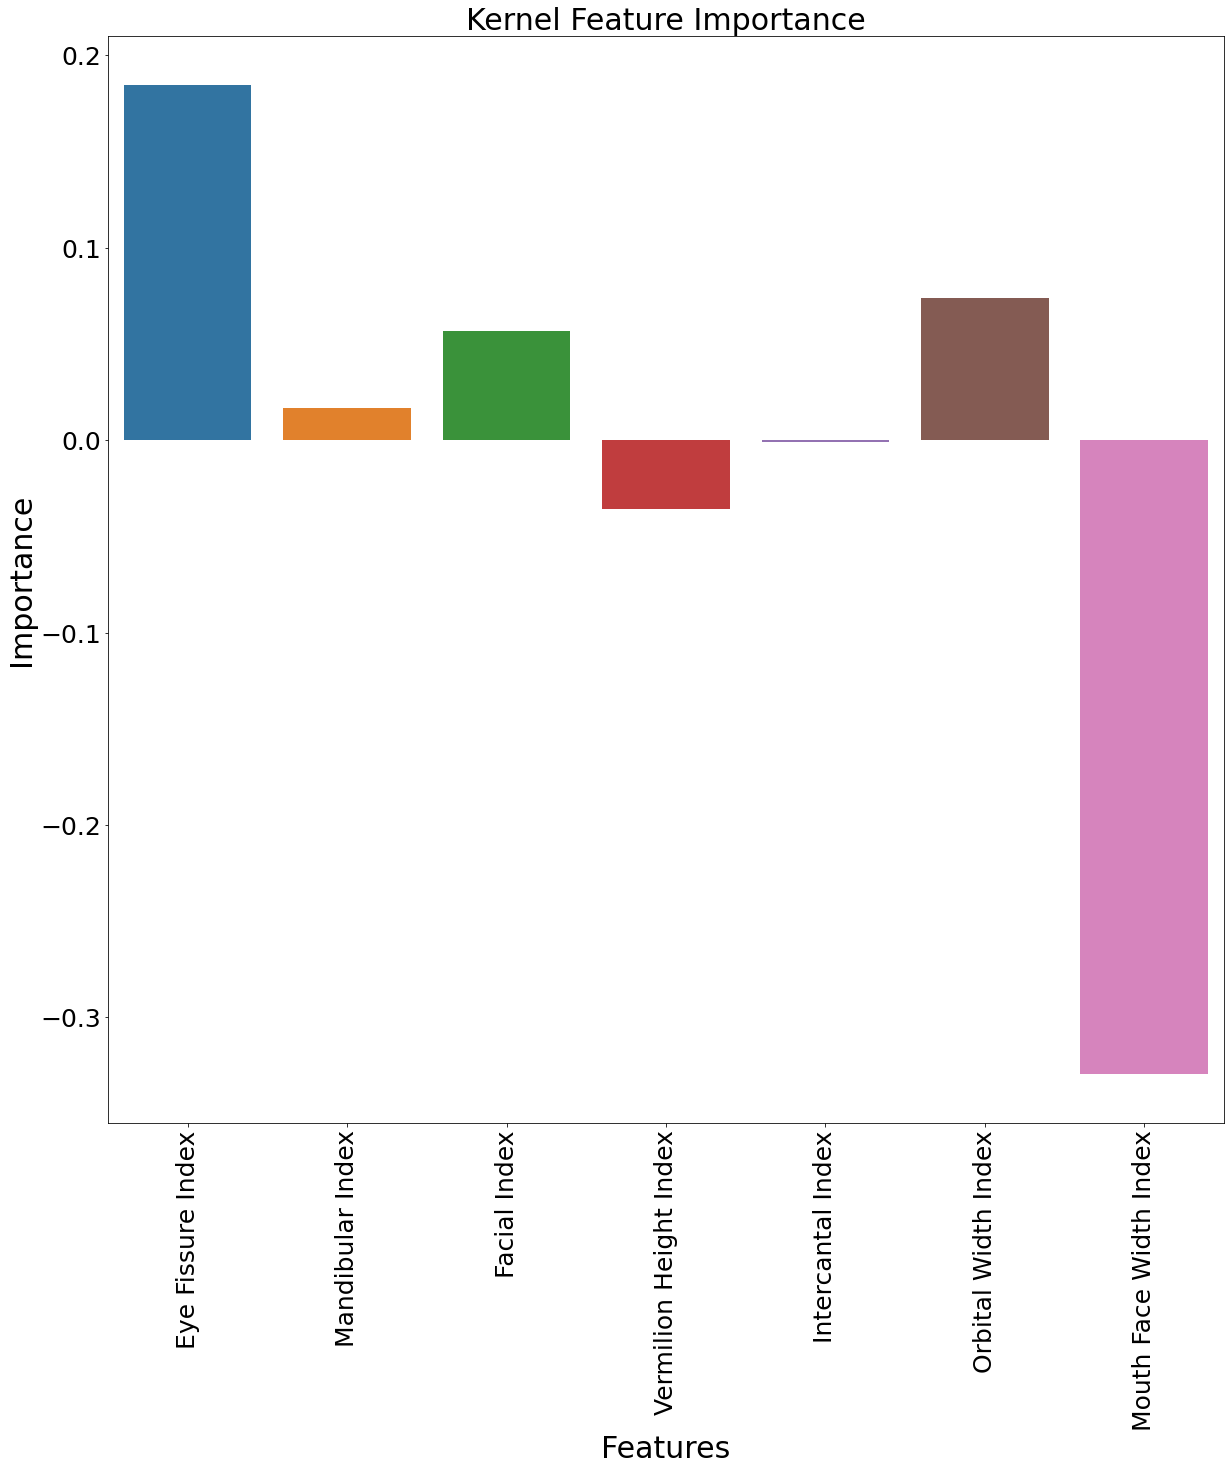

In [37]:
plt.figure(figsize=(20,20))
plt.title('Kernel Feature Importance', fontsize=30)
sns.barplot(importance_df.Feature, importance_df['Kernel Importance'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Importance', fontsize=30)
plt.show()

In [38]:
importance_df = importance_df.sort_values('Polynomial Importance',ascending=False)

E:\anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


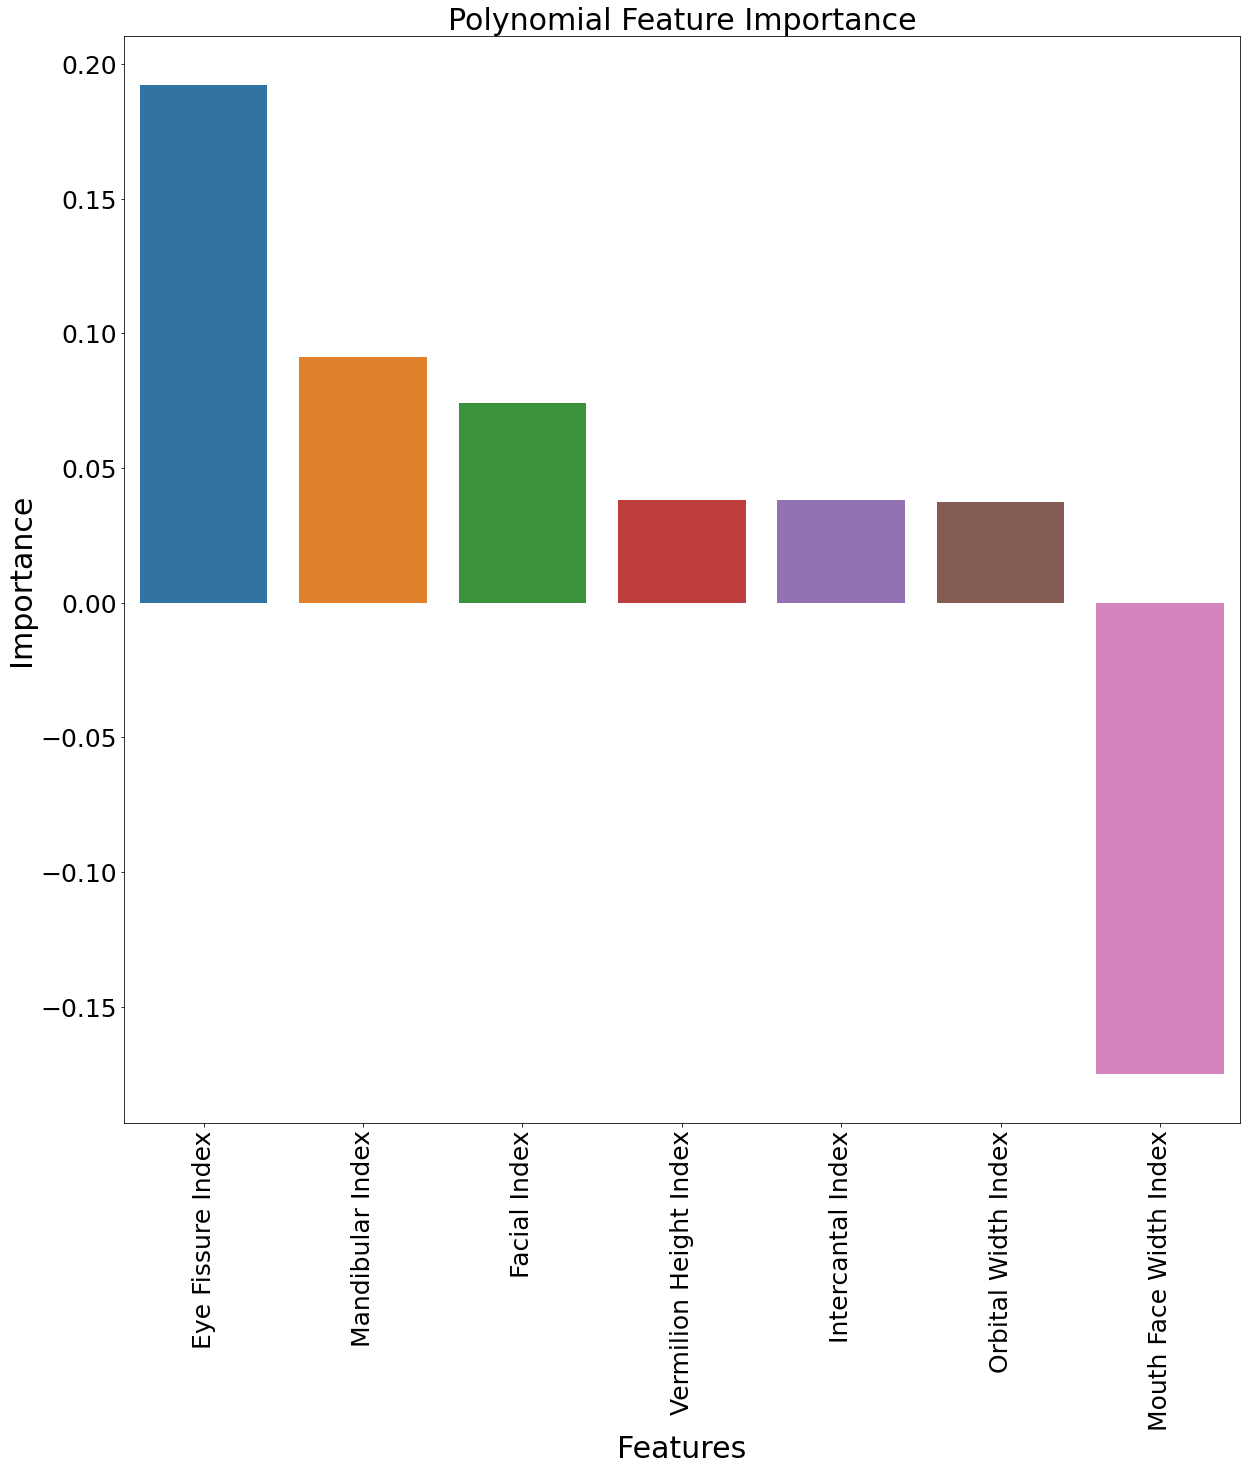

In [39]:
plt.figure(figsize=(20,20))
plt.title('Polynomial Feature Importance', fontsize=30)
sns.barplot(importance_df.Feature, importance_df['Polynomial Importance'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Importance', fontsize=30)
plt.show()

In [73]:
importance_df.head()

,Feature,Polynomial Importance,Kernel Importance
4,Eye Fissure Index,0.192191,0.184472
1,Mandibular Index,0.091105,0.016482
0,Facial Index,0.074258,0.056731
5,Vermilion Height Index,0.038170,-0.035863
2,Intercantal Index,0.038075,-0.001118


In [74]:
importance_df.to_csv(dir +'/feature_importance_by_model.csv',index=False)

# Plotting the actual and predicted values using Polynomial and Kernel Regression

### dropping the 'Mouth Face Width Index'  feature for polynomial model and dropping 'Mouth Face Width Index','Vermilion Height Index' for Kernel Regression

In [40]:
valid['Polynomial Prediction'] = poly.predict(X_valid.drop(['Mouth Face Width Index'], axis=1))
valid['Kernel Prediction'] = kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1))

## New columns in the validation data to store the errors for Polynomial and Kernel regression errors

In [41]:
X_valid.columns

Index(['Facial Index', 'Mandibular Index', 'Intercantal Index',
       'Orbital Width Index', 'Eye Fissure Index', 'Vermilion Height Index',
       'Mouth Face Width Index'],
      dtype='object')

In [85]:
valid['Polynomial Error'] = abs(valid[['AGE']] -  poly.predict(X_valid.drop(['Mouth Face Width Index'], axis=1)))

In [86]:
valid['Kernel Error'] = abs(valid[['AGE']] -  kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1)))

## saving the results in csv

In [87]:
valid.to_csv(dir +'/validation.csv',index=False)

In [45]:
valid=pd.read_csv(dir +'/validation.csv')


In [95]:
valid.shape

(212, 13)

In [103]:
valid.head(34)

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE,Polynomial Prediction,Kernel Prediction,Polynomial Error,Kernel Error
0,67,0.801202,0.384110,0.455566,0.595388,0.510064,0.710879,0.341422,4,8.569194,8.298242,4.569194,4.298242
1,67,0.875611,0.479769,0.466780,0.576396,0.320052,0.604060,0.466489,14,20.945312,21.427020,6.945312,7.427020
2,67,0.863706,0.466225,0.407972,0.755228,0.442781,0.523772,0.465587,17,16.264865,17.175629,0.735135,0.175629
3,67,0.865090,0.467520,0.385056,0.765559,0.337882,0.478256,0.381578,21,20.118157,22.162841,0.881843,1.162841
4,67,0.968960,0.498956,0.373540,0.940281,0.452196,0.526305,0.376770,23,22.120715,22.654282,0.879285,0.345718
5,67,0.916852,0.461898,0.399393,0.759700,0.410367,0.865883,0.436072,26,19.990857,20.821908,6.009143,5.178092
6,67,0.937980,0.529639,0.409808,0.789669,0.413607,0.907875,0.449523,28,22.513484,21.912476,5.486516,6.087524
7,67,0.943741,0.485324,0.431990,0.665502,0.337477,0.721899,0.494448,30,24.093716,24.648306,5.906284,5.351694
8,67,0.950749,0.446025,0.422503,0.693731,0.360759,0.781372,0.510735,33,22.744971,23.584209,10.255029,9.415791
9,67,0.876968,0.410203,0.400791,0.754715,0.356641,0.595861,0.442349,39,18.526719,19.673195,20.473281,19.326805


## plotting the actual and predicted values for both the models in the Validation dataset

In [120]:
valid.loc[valid['ID']==82] 

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE,Polynomial Prediction,Kernel Prediction,Polynomial Error,Kernel Error
201,82,0.766796,0.316901,0.451261,0.595556,0.339884,0.842729,0.324346,0,11.088683,8.105840,11.088683,8.105840
202,82,0.823877,0.400643,0.389182,0.799787,0.455590,0.469132,0.304340,3,12.387378,12.022692,9.387378,9.022692
203,82,0.956653,0.436934,0.390209,0.783629,0.394072,0.555210,0.398375,16,21.864623,21.032567,5.864623,5.032567
204,82,0.999093,0.510771,0.387691,0.752627,0.389192,0.440878,0.367898,18,25.939509,22.465544,7.939509,4.465544
205,82,0.961396,0.486345,0.373479,0.883768,0.357279,0.411729,0.388931,20,24.665195,24.490473,4.665195,4.490473
206,82,0.944901,0.469341,0.421650,0.657527,0.342256,0.299782,0.377414,21,23.585170,24.700674,2.585170,3.700674
207,82,0.971190,0.456241,0.431464,0.688562,0.362097,0.776495,0.421004,22,23.875408,23.920206,1.875408,1.920206
208,82,0.922055,0.457388,0.366031,0.807954,0.402890,0.800289,0.386978,23,20.634496,21.588097,2.365504,1.411903
209,82,0.948693,0.473651,0.409538,0.731037,0.290797,0.600109,0.465623,25,25.778792,24.410817,0.778792,0.589183
210,82,0.914195,0.500786,0.416904,0.543606,0.480518,0.876548,0.394899,27,18.346106,19.502142,8.653894,7.497858


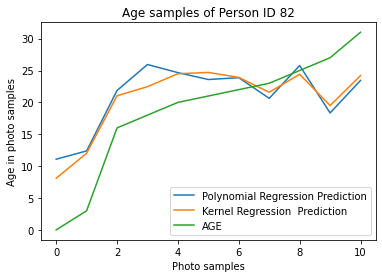

In [147]:
case1 = valid.loc[valid['ID']==82].copy() 
case1['x'] = [i for i in range(len(case1))]
plt.title('Age samples of Person ID 82')
plt.xlabel('Photo samples')
plt.ylabel('Age in photo samples')
plt.plot(case1['x'], case1['Polynomial Prediction'])

plt.plot(case1['x'], case1['Kernel Prediction'])

plt.plot(case1['x'], case1['AGE'])
plt.legend(['Polynomial Regression Prediction','Kernel Regression  Prediction' , 'AGE'])
plt.show()

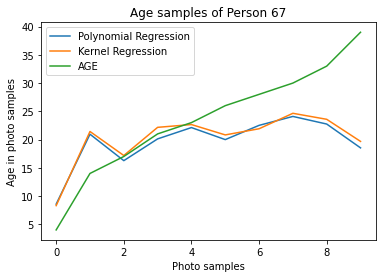

In [127]:
case1 = valid[valid['ID']==67].copy()
case1['x'] = [i for i in range(len(case1))]

plt.plot(case1['x'], case1['Polynomial Prediction'])

plt.plot(case1['x'], case1['Kernel Prediction'])
plt.title('Age samples of Person 67')
plt.xlabel('Photo samples')
plt.ylabel('Age in photo samples')
plt.plot(case1['x'], case1['AGE'])
plt.legend(['Polynomial Regression','Kernel Regression', 'AGE'])
plt.show()

# Which Model is better

#### We see that Kernel Regression Model is slightly better thant the Polonomial model because it has a lower MSE value of 9.77

## Caculating the error for different age groups

In [42]:
error_by_age  = pd.DataFrame()

In [46]:
kernel_error = (valid.groupby(['AGE'])['Kernel Error'].sum()/valid.groupby(['AGE'])['Kernel Error'].count()).reset_index()

In [47]:
poly_error = (valid.groupby(['AGE'])['Polynomial Error'].sum()/valid.groupby(['AGE'])['Polynomial Error'].count()).reset_index()

In [48]:
errors_by_age = pd.merge(kernel_error, poly_error, how = 'inner', on = 'AGE')

In [ ]:
errors_by_age.to_csv(dir +'/errors_by_age_validation.csv',index=False)

E:\anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


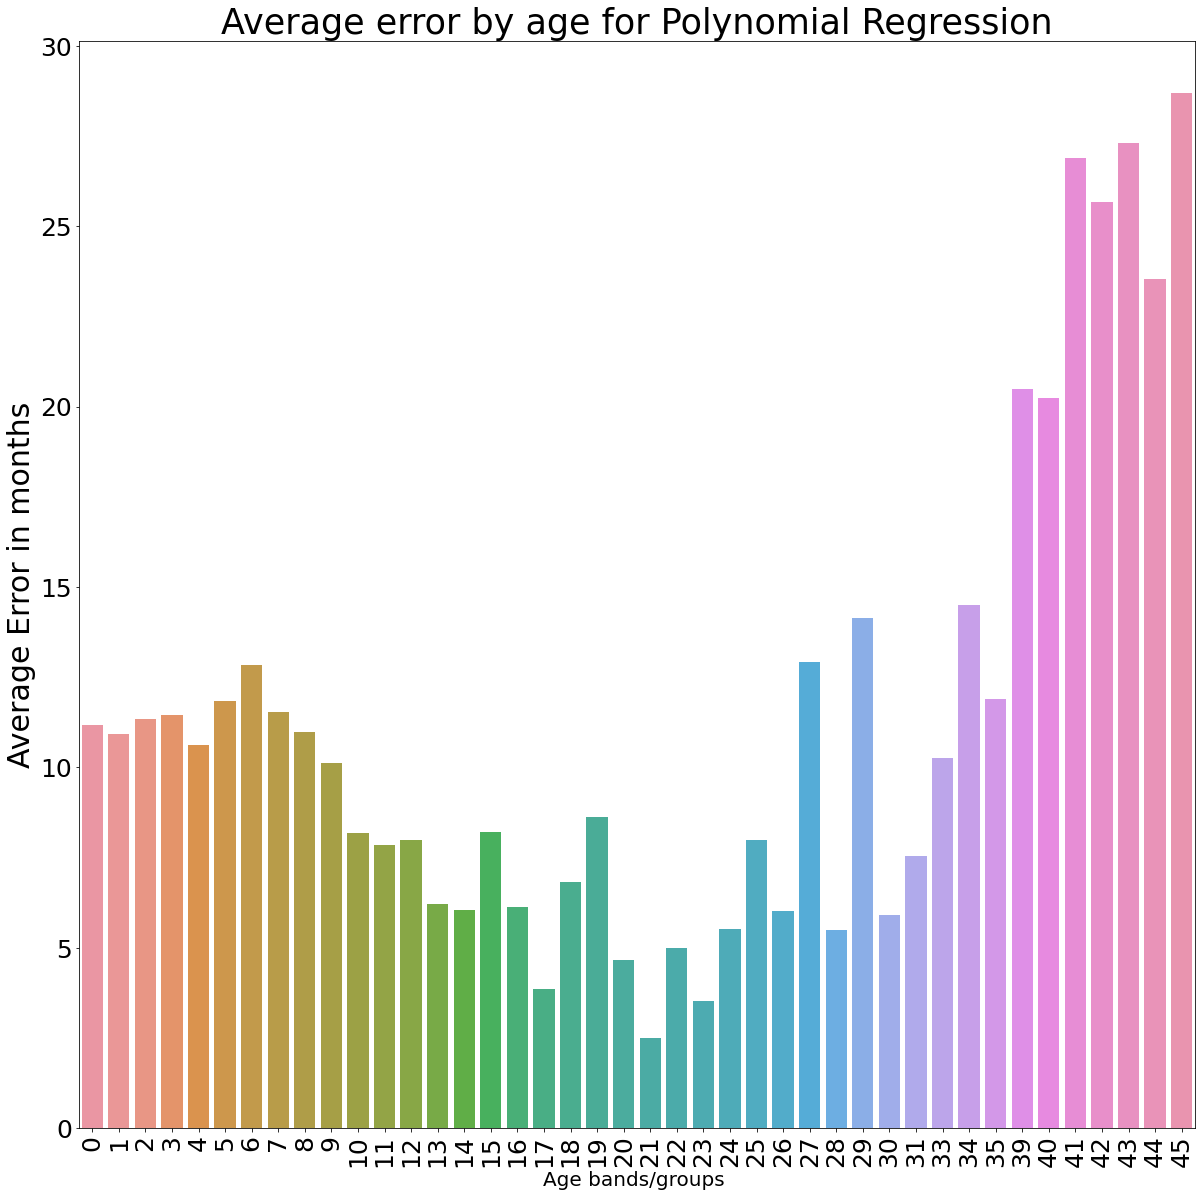

In [53]:
plt.figure(figsize=(20,20))
plt.title("Average error by age for Polynomial Regression", fontsize = 35)
sns.barplot(errors_by_age.AGE, errors_by_age['Polynomial Error'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Age bands/groups ',fontsize=20)
plt.ylabel('Average Error in months', fontsize=30)
plt.show()

E:\anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


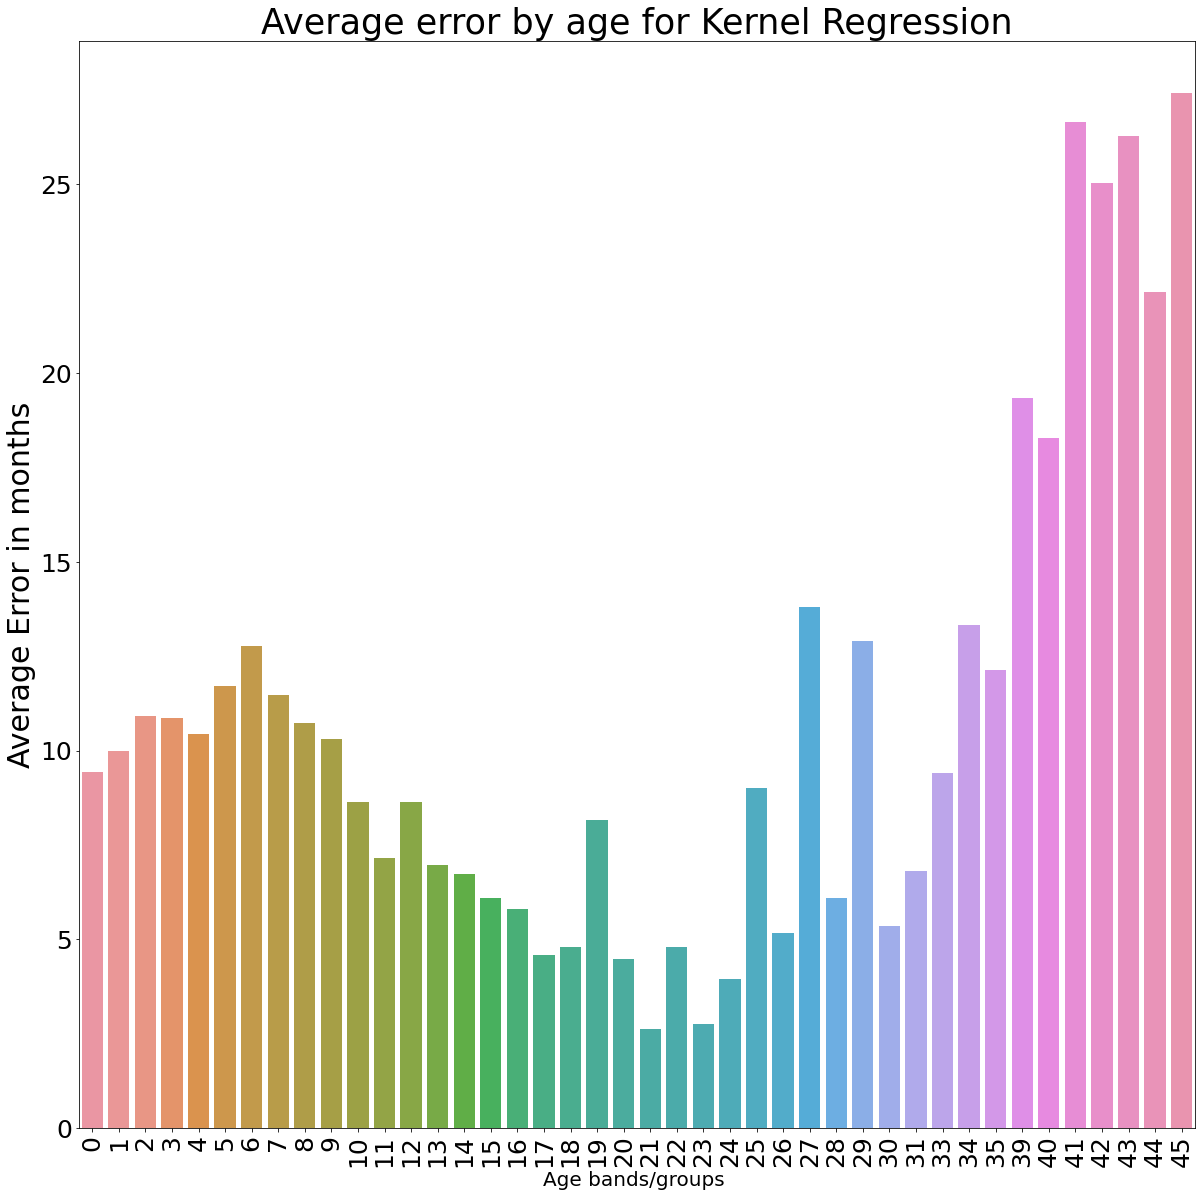

In [54]:
plt.figure(figsize=(20,20))
plt.title("Average error by age for Kernel Regression", fontsize = 35)
sns.barplot(errors_by_age['AGE'], errors_by_age['Kernel Error'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Age bands/groups ',fontsize=20)
plt.ylabel('Average Error in months', fontsize=30)
plt.show()

# Why error is higher for  age group above 45

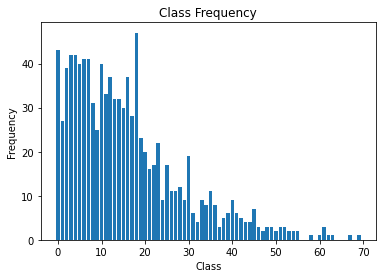

In [55]:
classes=final_df[['AGE']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()